In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
import numpy as np

In [2]:
#getting csv
df = pd.read_csv('Rice_Cammeo_Osmancik.csv')
df

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231  525.578979         229.749878          85.093788      0.928882   
1     14656  494.311005         206.020065          91.730972      0.895405   
2     14634  501.122009         214.106781          87.768288      0.912118   
3     13176  458.342987         193.337387          87.448395      0.891861   
4     14688  507.166992         211.743378          89.312454      0.906691   
...     ...         ...                ...                ...           ...   
3805  11441  415.858002         170.486771          85.756592      0.864280   
3806  11625  421.390015         167.714798          89.462570      0.845850   
3807  12437  442.498993         183.572922          86.801979      0.881144   
3808   9882  392.296997         161.193985          78.210480      0.874406   
3809  11434  404.709992         161.079269          90.868195      0.825692   

      Convex_Area    Extent     Class  
0           15617  0.572896    Cammeo  
1           15072  0.615436    Cammeo  
2           14954  0.693259    Cammeo  
3           13368  0.640669    Cammeo  
4           15262  0.646024    Cammeo  
...           ...       ...       ...  
3805        11628  0.681012  Osmancik  
3806        11904  0.694279  Osmancik  
3807        12645  0.626739  Osmancik  
3808        10097  0.659064  Osmancik  
3809        11591  0.802949  Osmancik  

[3810 rows x 8 columns]

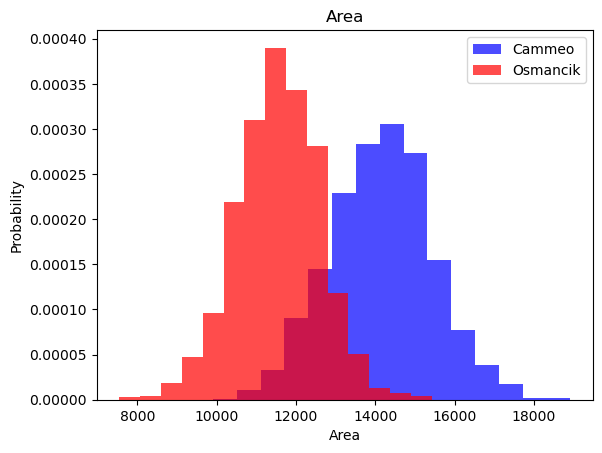

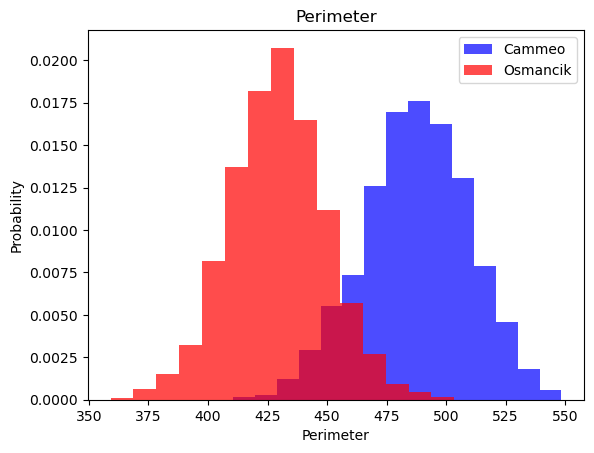

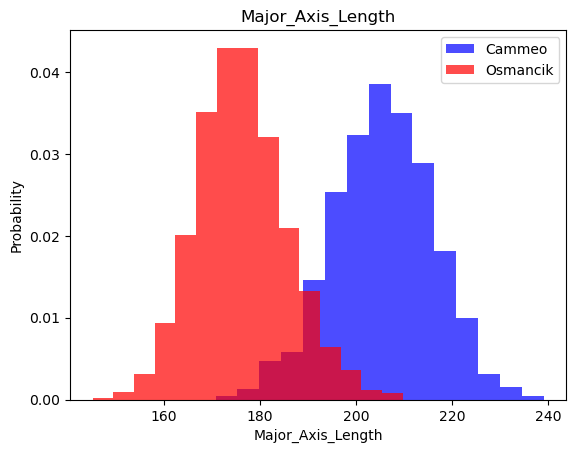

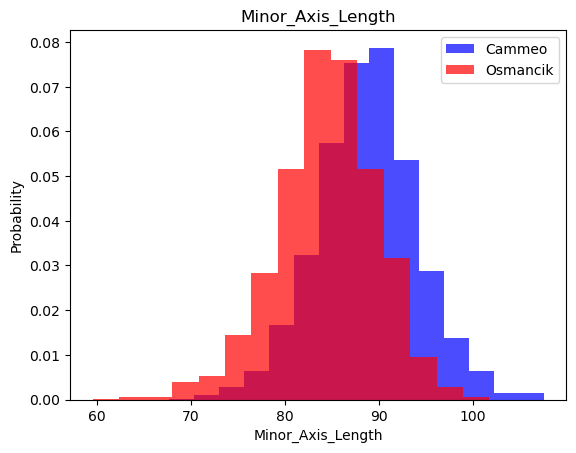

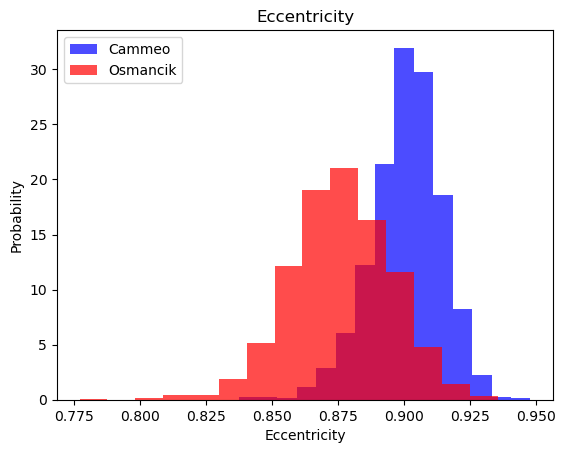

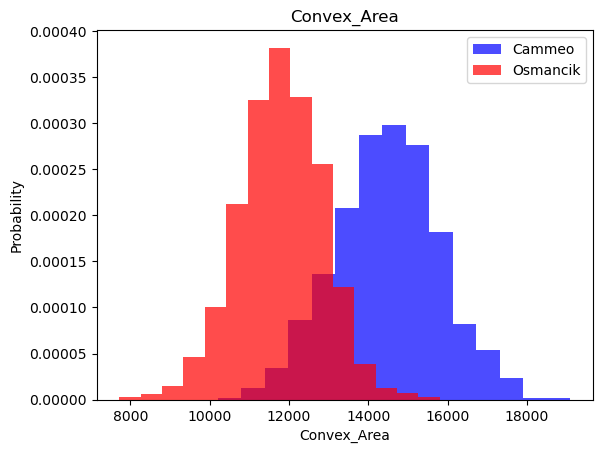

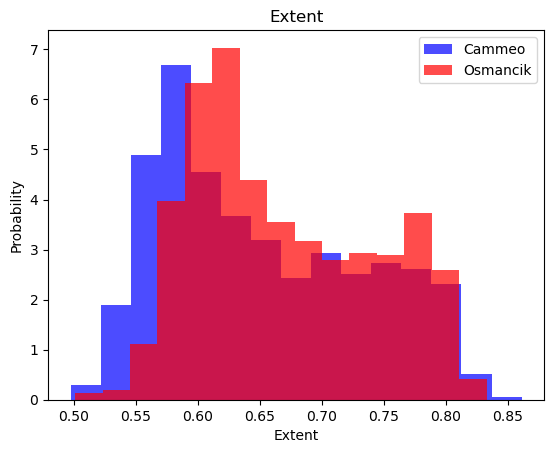

In [3]:
#creating a histogram to graph each of the features
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Class'] == 'Cammeo'][label], color='blue', label='Cammeo', alpha=0.7, density=True, bins=15,)
  plt.hist(df[df['Class'] == 'Osmancik'][label], color='red', label='Osmancik', alpha=0.7, density=True, bins=15,)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [4]:
#Independent features are determined
X = df[df.columns[:-1]]
X.shape

(3810, 7)

In [5]:
#Dependant feature is determined
y = df[df.columns[-1]]
y.shape

(3810,)

In [6]:
#Data is split into training and testing data at 20% being testing, this is done three time to ensure accuracy
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=10)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=20)

In [7]:
#The decision tree classifer is created and 3 of them are trained with the previous data
clf = DecisionTreeClassifier(max_depth = 3)
clf1 = clf.fit(X_train1, y_train1)
clf2 = clf.fit(X_train2, y_train2)
clf3 = clf.fit(X_train3, y_train3)

In [8]:
#predictions are maid using the testing set split off earlier for each model
y_pred1 = clf1.predict(X_test1)
y_pred2 = clf2.predict(X_test2)
y_pred3 = clf3.predict(X_test3)

In [9]:
#The accuracy of each model is determined
print("Accuracy1:", metrics.accuracy_score(y_test1, y_pred1))
print("Accuracy2:", metrics.accuracy_score(y_test2, y_pred2))
print("Accuracy3:", metrics.accuracy_score(y_test3, y_pred3))

Accuracy1: 0.9330708661417323
Accuracy2: 0.9186351706036745
Accuracy3: 0.9330708661417323


In [10]:
#classes are defined
classes = ['Cammeo', 'Osmancik']
print(classes)

['Cammeo', 'Osmancik']


In [11]:
#plot for decision tree 1
fig1 = plt.figure(figsize=(100, 100)) # Adjust the size as needed
_ = tree.plot_tree(clf1, 
                   feature_names = X.columns.tolist(), # Replace with your actual feature names
                   class_names= classes, # Replace with your actual class names
                   filled=True)
plt.show()

In [12]:
#plot for decision tree 2
fig2 = plt.figure(figsize=(100, 100)) # Adjust the size as needed
_ = tree.plot_tree(clf2, 
                   feature_names = X.columns.tolist(), # Replace with your actual feature names
                   class_names= classes, # Replace with your actual class names
                   filled=True)
plt.show()

In [13]:
#plot for decision tree 3
fig3 = plt.figure(figsize=(100, 100)) # Adjust the size as needed
_ = tree.plot_tree(clf3, 
                   feature_names = X.columns.tolist(), # Replace with your actual feature names
                   class_names= classes, # Replace with your actual class names
                   filled=True)
plt.show()

In [15]:
#each of the plots are saved as pngs
fig1.savefig("decision_tree1.png")
fig2.savefig("decision_tree2.png")
fig3.savefig("decision_tree3.png")